# Divorce Prediction

Jan Maděra

* Source: https://www.kaggle.com/andrewmvd/divorce-prediction

* Prediction of divorce based on 54 answers to questionaire


Subslide

## Dataset

* 170 couples from Turkey
* 54 questions with 5 point scale response:
    * (0=Never, 1=Seldom, 2=Averagely, 3=Frequently, 4=Always)
* Divorce column (1=couple stayed together, 0=divorced)

In [1]:
import pandas as pd

df = pd.read_csv('divorce_data.csv', sep=';')
display(df)
#display(df.head())
print("Divorce values:")
print(df['Divorce'].value_counts())

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


Divorce values:
0    86
1    84
Name: Divorce, dtype: int64


## Dataset questions

In [2]:
reference = pd.read_csv('reference.tsv', sep='|')
with pd.option_context('display.max_colwidth', None):  # more options can be specified also
    for i, desc in enumerate(reference["description"]):
        print()
        print(i, ": ", desc)


0 :  If one of us apologizes when our discussion deteriorates, the discussion ends.

1 :  I know we can ignore our differences, even if things get hard sometimes.

2 :  When we need it, we can take our discussions with my spouse from the beginning and correct it.

3 :  When I discuss with my spouse, to contact him will eventually work.

4 :  The time I spent with my wife is special for us.

5 :  We don't have time at home as partners.

6 :  We are like two strangers who share the same environment at home rather than family.

7 :  I enjoy our holidays with my wife.

8 :  I enjoy traveling with my wife.

9 :  Most of our goals are common to my spouse.

10 :  I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.

11 :  My spouse and I have similar values in terms of personal freedom.

12 :  My spouse and I have similar sense of entertainment.

13 :  Most of our goals for people (children, friends, etc.) are the same.

14 : 

In [3]:
for i in range(20):
    print()


### Correlation

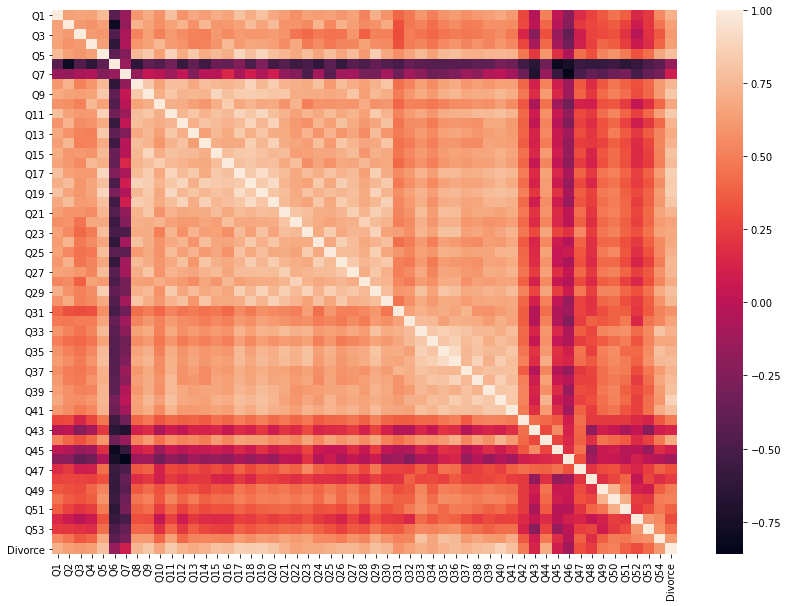

In [4]:
# Plot correlogram
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(2*df.corr()-1)
plt.show()

## Classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

from graphviz import Source

X = df.drop(['Divorce'], axis=1)
y = df['Divorce']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=None)

### Decision Tree Classifier
test_size=0.5

tree depth: <bound method BaseDecisionTree.get_depth of DecisionTreeClassifier(max_depth=1)> accuracy: 0.9647


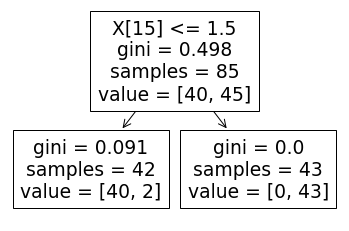

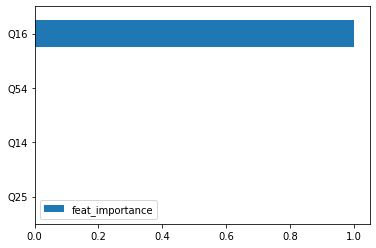

tree depth: <bound method BaseDecisionTree.get_depth of DecisionTreeClassifier(max_depth=2)> accuracy: 0.9882


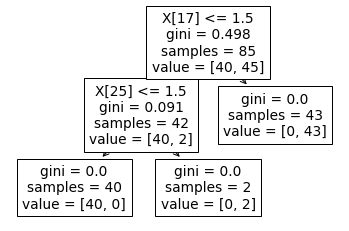

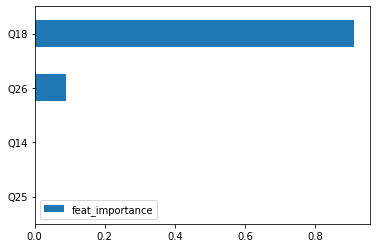

tree depth: <bound method BaseDecisionTree.get_depth of DecisionTreeClassifier(max_depth=3)> accuracy: 0.9647


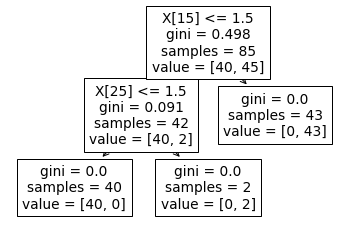

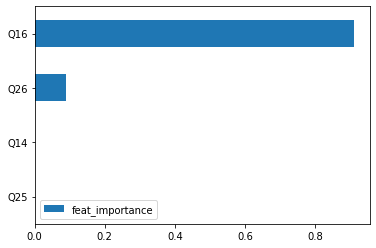

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

for i in range(1,4):
    dt = tree.DecisionTreeClassifier(max_depth = i)

    dt.fit(X_train, y_train)
    tree.plot_tree(dt)
    print("tree depth:",dt.get_depth, "accuracy:", "{:.4f}".format(dt.score(X_test, y_test)))
    dt_feat = pd.DataFrame(dt.feature_importances_, index=X_train.columns, columns=['feat_importance'])
    dt_feat.sort_values('feat_importance').tail(4).plot.barh()
    
    disp
    
    plt.show()



Q18: My spouse and I have similar ideas about how roles should be in marriage

Q16: We share the same views about being happy in our life with my spouse

Q26: I know what my spouse's current sources of stress are.

In [8]:
jupyter nbconvert ./OneDrive/MFF/LS2021/dobyvani_znalosti/projekt/projekt.ipynb --to slides --post serve --SlidesExporter.exclude_input=True --SlidesExporter.reveal_scroll=True

SyntaxError: invalid syntax (<ipython-input-8-b9c2e609010f>, line 1)